# 🚀 Rocket

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

## 📦 데이터 준비

In [81]:
# rocket = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/RocketLaunchDataCSV.csv')
rocket_original = pd.read_csv('data/RocketLaunchDataCSV.csv')
rocket = pd.DataFrame(rocket_original)
rocket.head(3)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN


### 🔍 데이터 탐색

In [82]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

#### ✒️ 자료형 변환

In [83]:
# rocket['Sea Level Pressure'].astype('float') 
# 변환할 수 없는 값은 null처리
rocket['Sea Level Pressure'] = pd.to_numeric(rocket['Sea Level Pressure'], errors='coerce')
rocket['Sea Level Pressure'].head(3)

0    30.22
1    30.20
2    30.25
Name: Sea Level Pressure, dtype: float64

In [84]:
def time_to_decimal(time_str):
    try:
        # 시간과 분을 분리
        hours, minutes = map(int, time_str.split(':'))
        # 24시간 기준으로 소수점 변환 (시간 + 분/60)
        return hours + minutes/60
    except:
        return None

# 컬럼에 적용
rocket['Day Length'] = rocket['Day Length'].apply(time_to_decimal)

# 확인
print("변환된 값 샘플:", rocket['Day Length'].head())
print("데이터 타입:", rocket['Day Length'].dtype)

변환된 값 샘플: 0    10.433333
1    10.433333
2    10.416667
3    10.416667
4    12.400000
Name: Day Length, dtype: float64
데이터 타입: float64


#### 🔍 object 타입 데이터

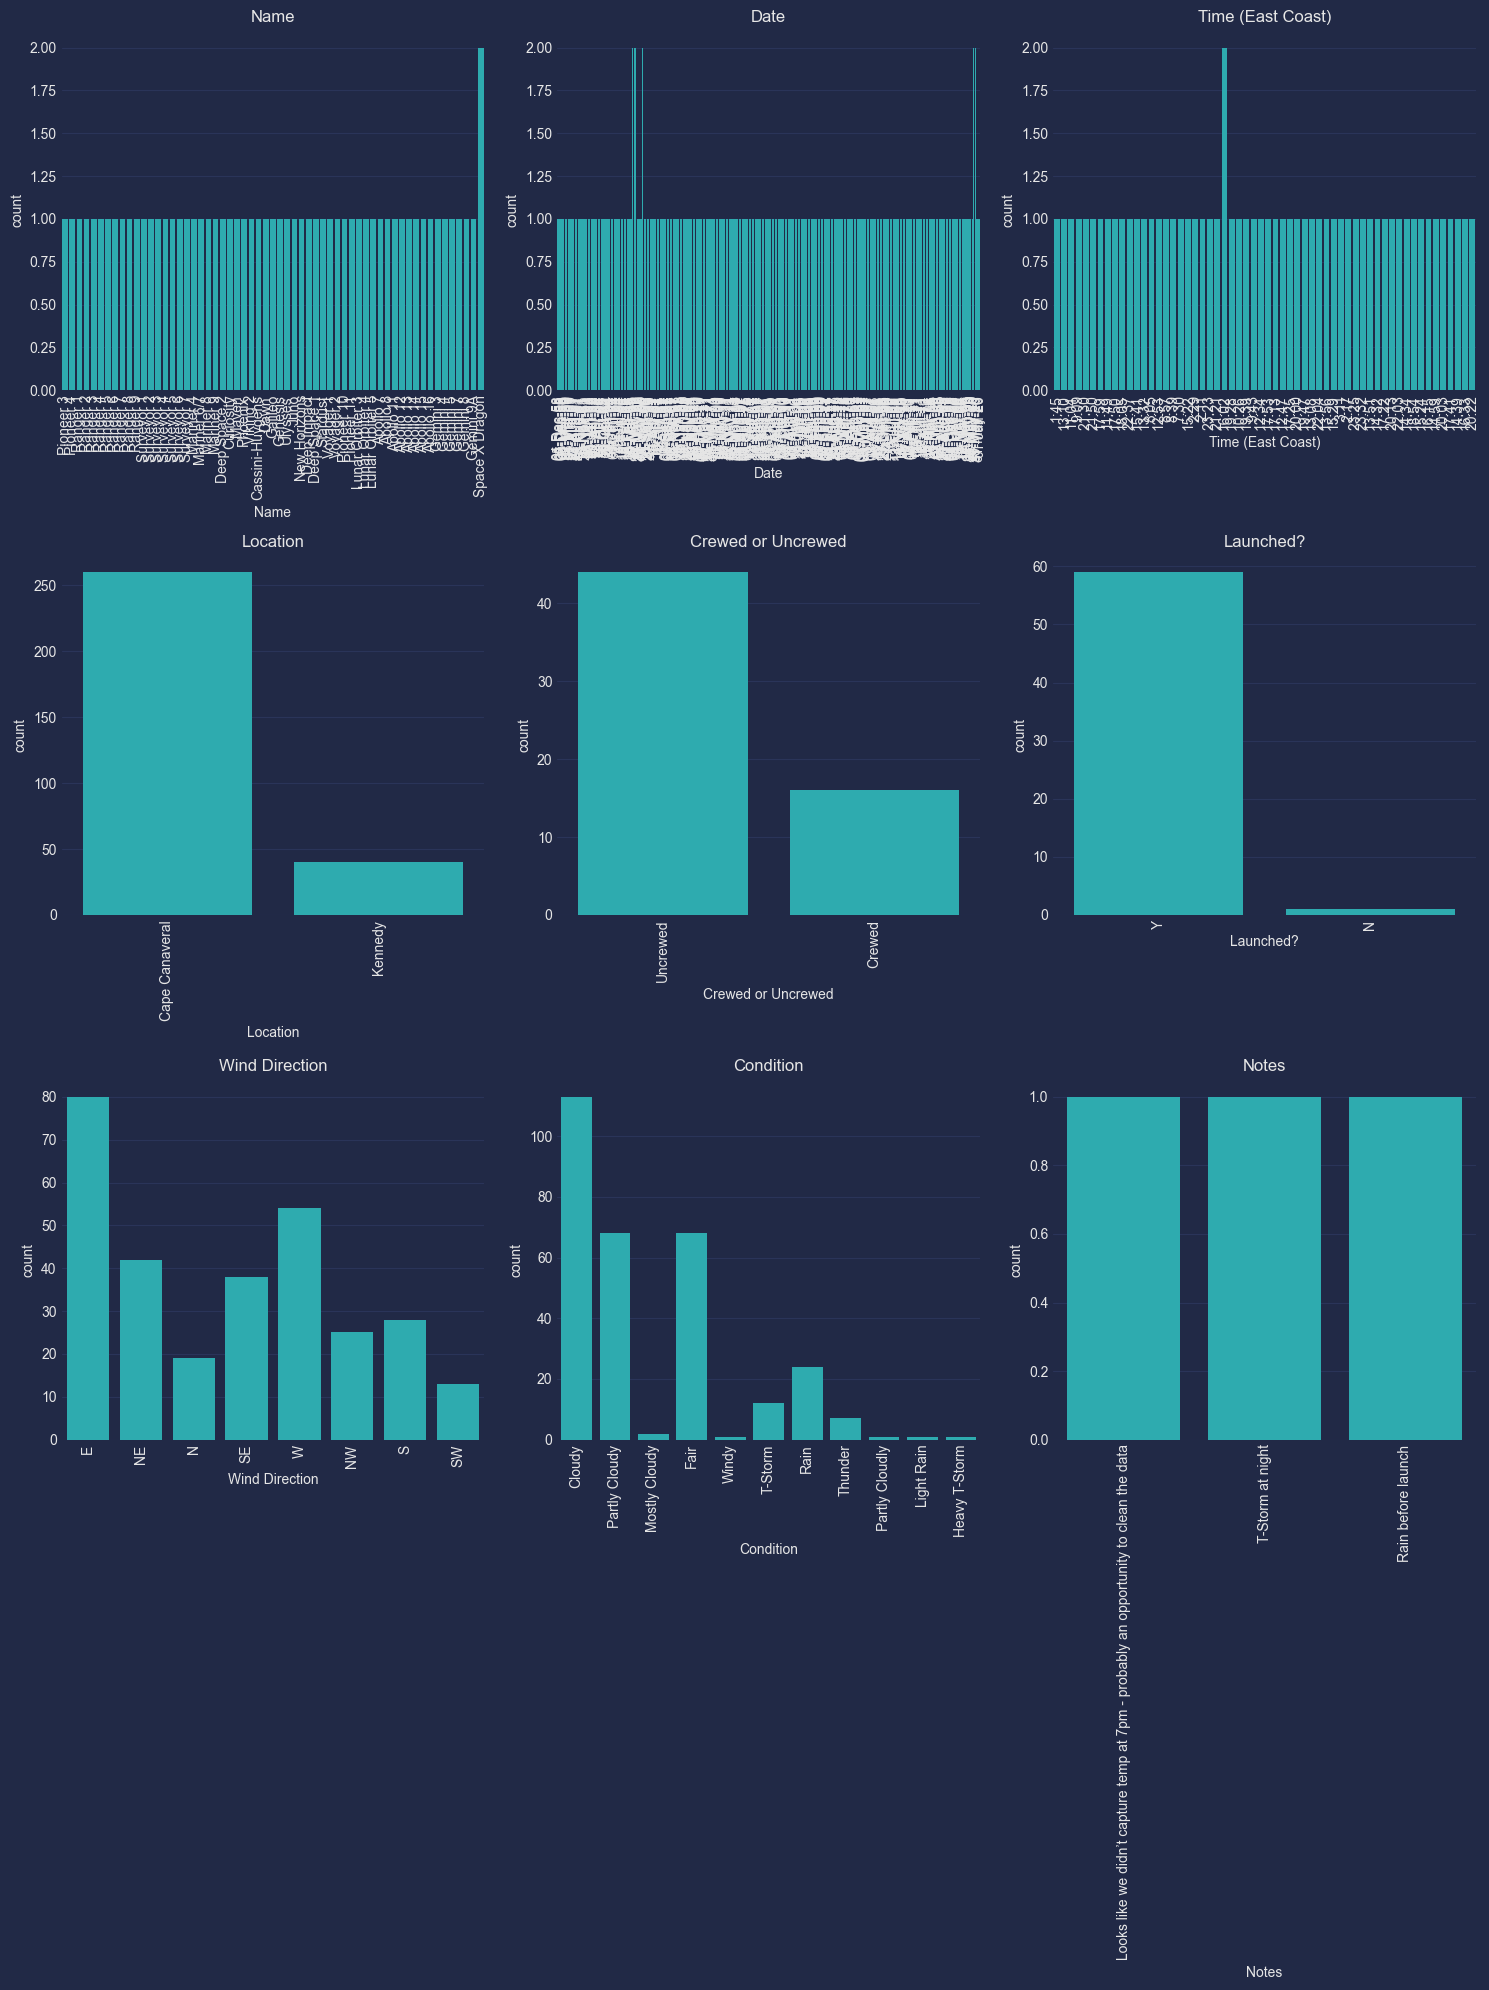

In [85]:
# 데이터타입이 object인 컬럼 추출출
object_cols = rocket.select_dtypes(include=['object']).columns
object_cols

# 데이터 분포 확인
plt.figure(figsize=(15,20))
i = 1
for col in object_cols:
    plt.subplot(3,3,i)
    i+=1
    sns.countplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

#### 🔍 float 타입 데이터

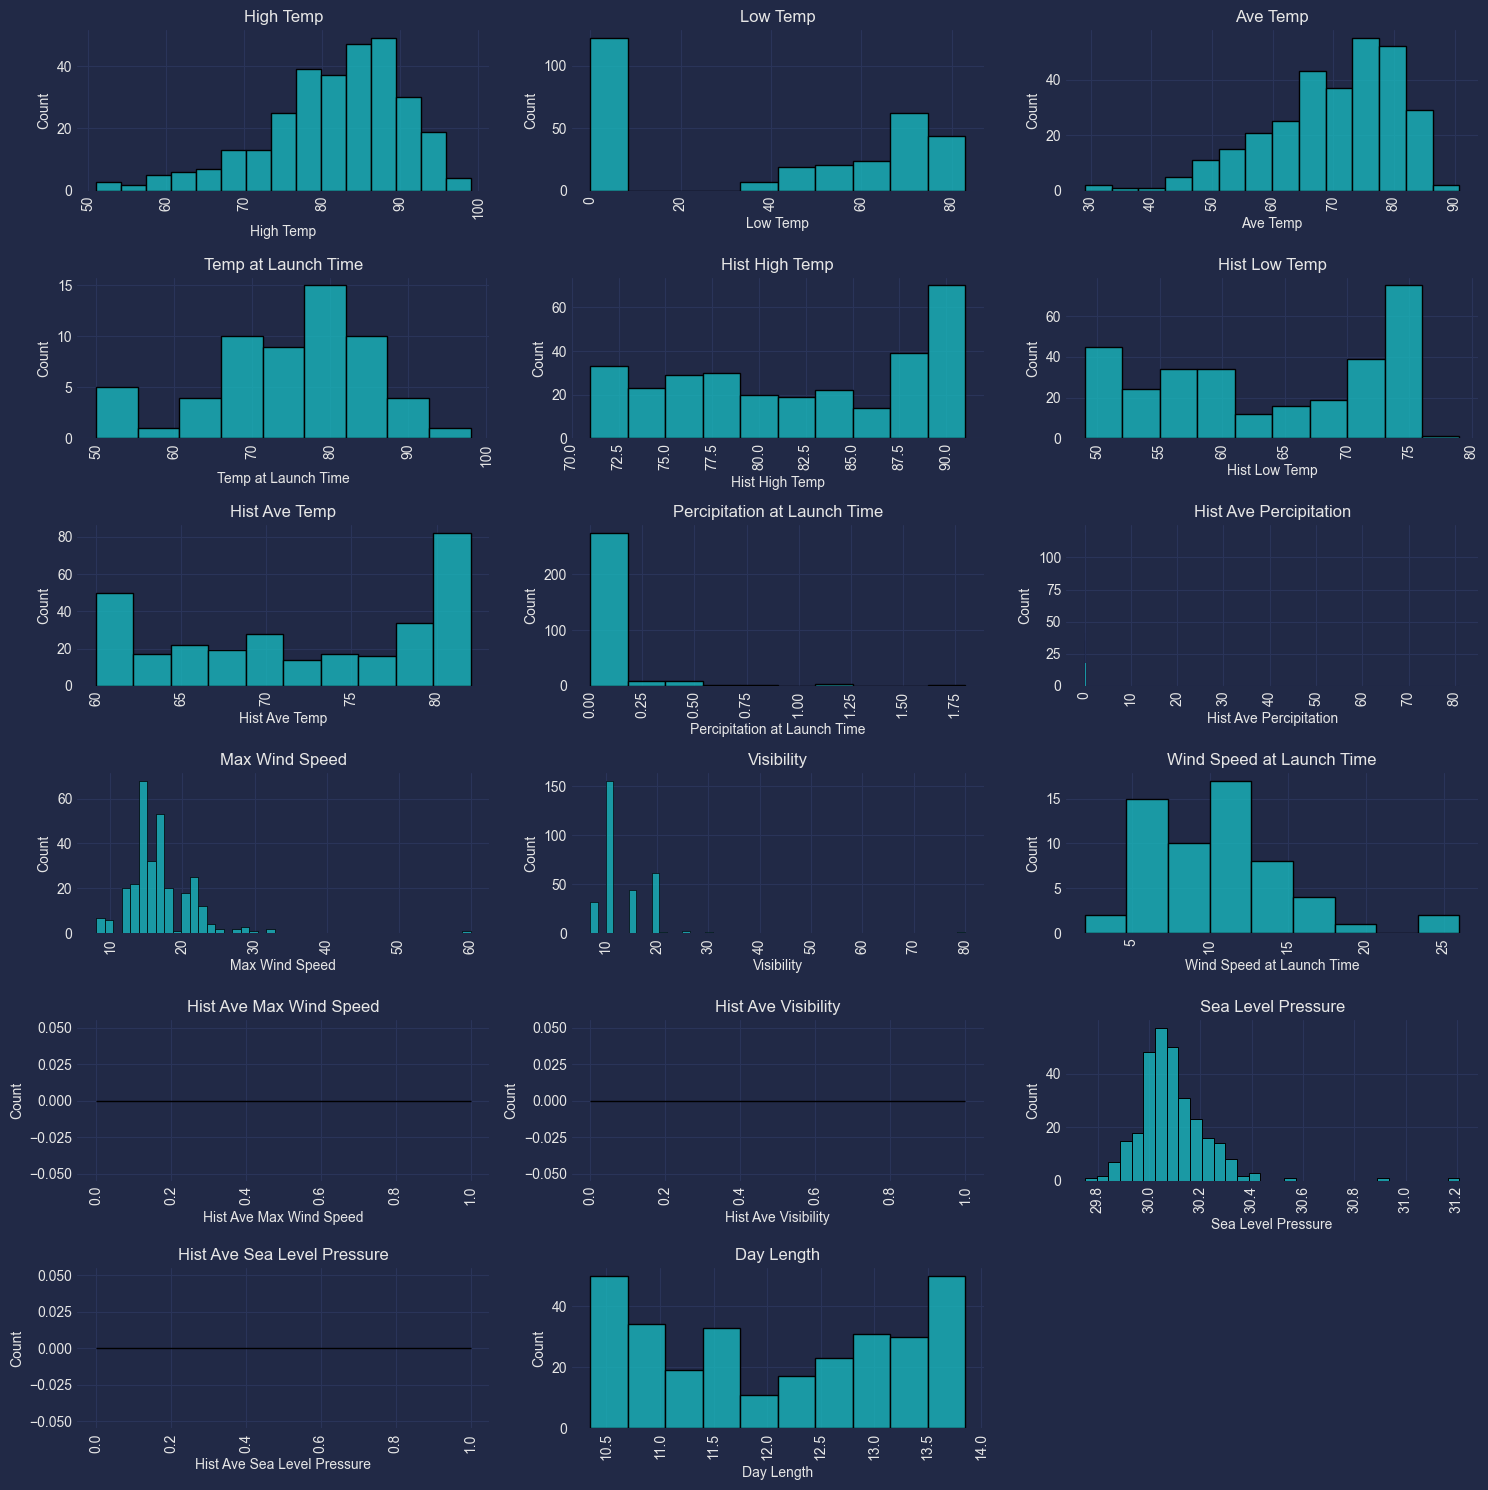

In [86]:
# 데이터타입이 float인 컬럼 추출
numeric_cols = rocket.select_dtypes(include=['int','float']).columns
numeric_cols

# 데이터 분포 확인
plt.figure(figsize=(15,15))
i = 1
for col in numeric_cols:
    plt.subplot(6,3,i)
    i+=1
    sns.histplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

## ✒️ 데이터 전처리

### 🗑️ 불필요한 컬럼 제거

In [117]:
# 사용하지 않을 컬럼
del_cols = ['Name', 'Date', 'Time (East Coast)','Notes',\
            'Percipitation at Launch Time', 'Hist Ave Percipitation',\
            'Hist Ave Max Wind Speed', 'Hist Ave Visibility','Hist Ave Sea Level Pressure']
rocket = rocket.drop(columns = del_cols)
rocket.head()

,Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,E,16.0,15.0,10.59322,30.22,10.433333,Cloudy
1,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,E,14.0,10.0,10.59322,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,NE,15.0,10.0,11.00000,30.25,10.416667,Cloudy
3,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,75.101695,75.0,55.0,65.0,N,10.0,10.0,10.59322,30.28,10.416667,Partly Cloudy
4,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,75.101695,75.0,55.0,65.0,E,12.0,10.0,10.59322,30.23,12.400000,Partly Cloudy


### ✒️ 결측치 확인 및 처리

In [118]:
# Crewed or Uncrewed --> 'Uncrewed'로 채우기
rocket['Crewed or Uncrewed'] = rocket['Crewed or Uncrewed'].fillna('Uncrewed')

# Launched? --> 'N'으로 채우기
rocket['Launched?'] = rocket['Launched?'].fillna('N')

In [119]:
# object타입 변수의 결측값 채우기 (최빈값으로 채우기)
obj_cols = rocket.select_dtypes(include=['object']).columns
rocket[obj_cols] = rocket[obj_cols].fillna(rocket[obj_cols].mode().iloc[0])
display(obj_cols)

Index(['Location', 'Crewed or Uncrewed', 'Launched?', 'Wind Direction',
       'Condition'],
      dtype='object')

In [120]:
# 수치형 타입 변수의 결측값 채우기 (평균값으로 채우기)
numeric_cols = rocket.select_dtypes(include=['int', 'float']).columns
rocket[numeric_cols] = rocket[numeric_cols].fillna(rocket[numeric_cols].mean())
display(numeric_cols)

Index(['High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Sea Level Pressure',
       'Day Length'],
      dtype='object')

In [121]:
rocket.head(3)

,Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,E,16.0,15.0,10.59322,30.22,10.433333,Cloudy
1,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,E,14.0,10.0,10.59322,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,NE,15.0,10.0,11.00000,30.25,10.416667,Cloudy


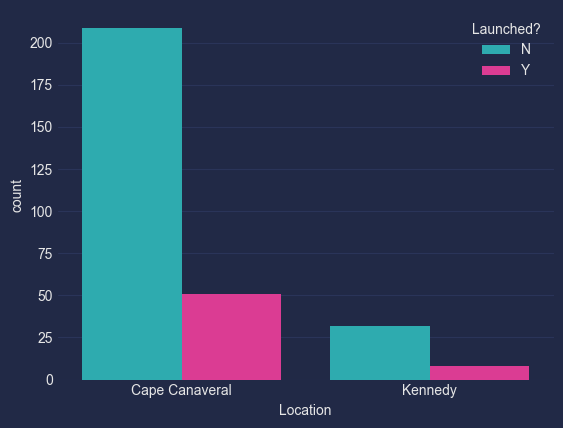

In [122]:
sns.countplot(data=rocket, x='Location', hue='Launched?')
plt.show()

## 🎛️ 독립변수와 종속변수

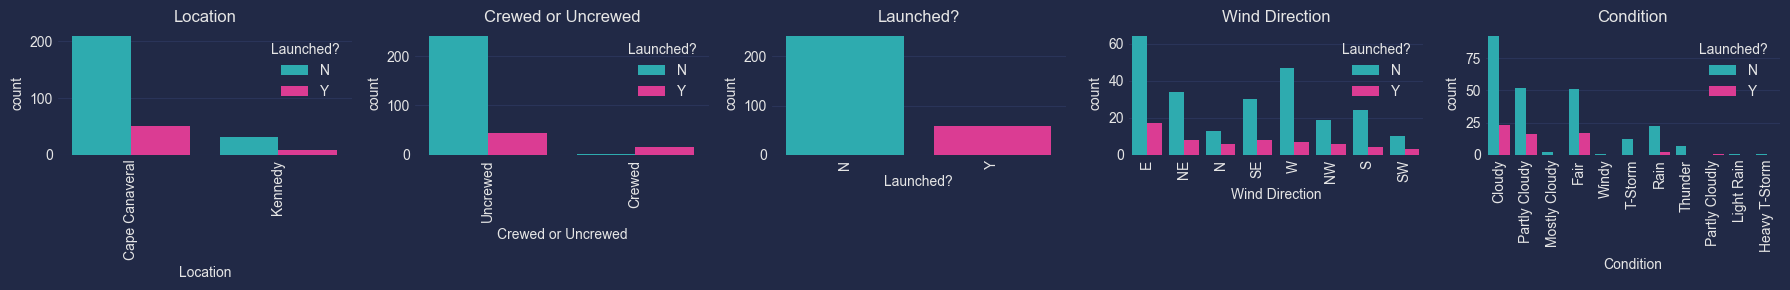

In [134]:
# 범주형 변수

plt.figure(figsize=(18, 3))

for i, col in enumerate(obj_cols, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=rocket, x=col, hue='Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()
plt.show()

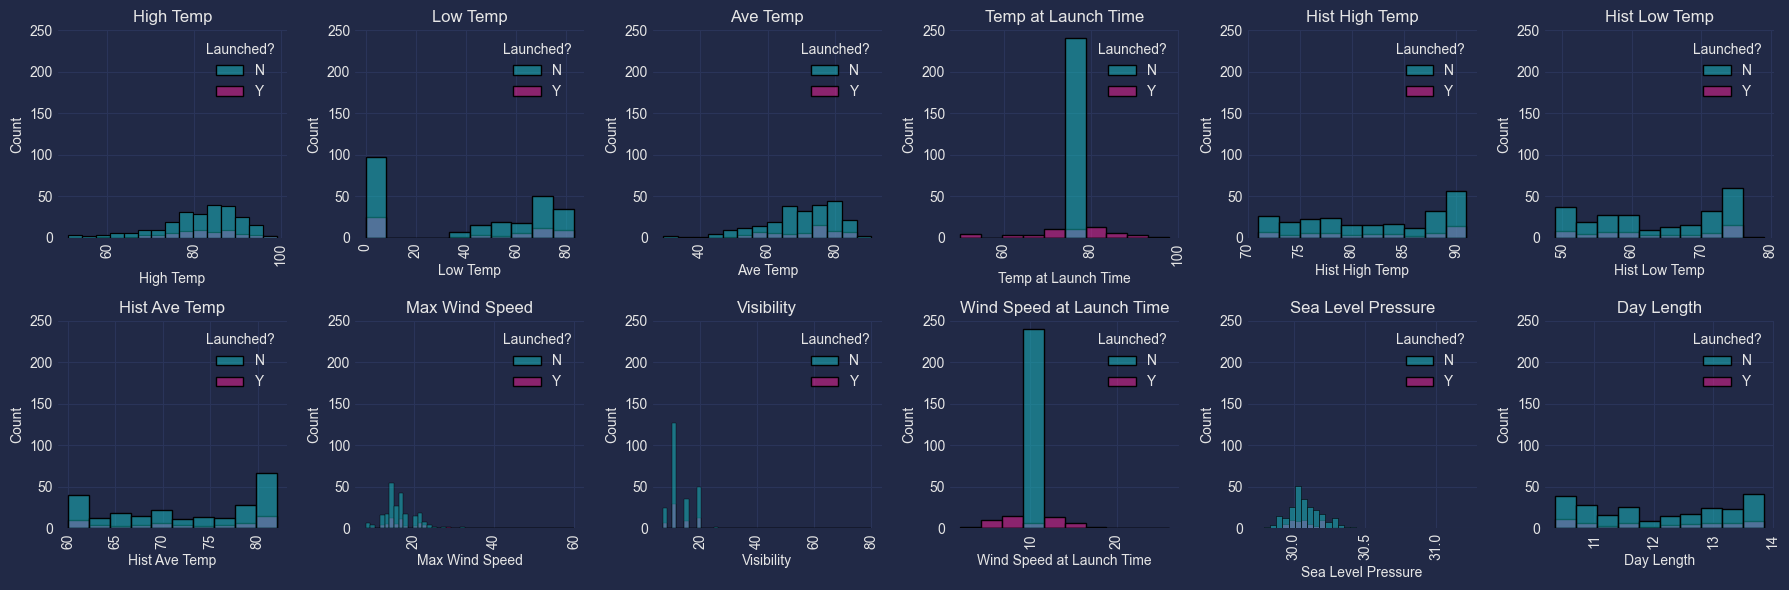

In [141]:
# 수치형 변수

plt.figure(figsize=(18, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 6, i)
    sns.histplot(data=rocket, x=col, hue='Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylim(0,250)
plt.tight_layout()

### 📍 변수 선택

In [151]:
X = rocket.drop(columns='Launched?')
y = rocket['Launched?']

X.shape, y.shape

((300, 16), (300,))

### 🔃 종속변수 인코딩
* Launched?
    * Y-->1
    * N-->0

In [152]:
y = y.map({'Y': 1, 'N': 0})
y.value_counts()

Launched?
0    241
1     59
Name: count, dtype: int64

### 🔃 독립변수 레이블인코딩

In [153]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in obj_cols:
    X[col] = encoder.fit_transform(rocket[col])

X.head(3)

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition,Launched?
0,0,1,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,0,16.0,15.0,10.59322,30.22,10.433333,0,0
1,0,1,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,0,14.0,10.0,10.59322,30.20,10.433333,0,0
2,0,1,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,2,15.0,10.0,11.00000,30.25,10.416667,0,1


In [159]:
display(rocket['Crewed or Uncrewed'].value_counts())
display(X['Crewed or Uncrewed'].value_counts())

Crewed or Uncrewed
Uncrewed    284
Crewed       16
Name: count, dtype: int64

Crewed or Uncrewed
1    284
0     16
Name: count, dtype: int64

# 모델링

## 훈련세트/테스트세트 분할


## 모델 생성 및 훈련

## 분류 모델의 평가지표

In [93]:
#ROC curve와 AUC 

# ROC curve

# AUC

# 모델의 학습 결과

In [94]:
# 시각화

In [95]:
# 트리의 깊이

In [96]:
# 특성의 중요도

# 변수 재선택

# 불균형 데이터 처리

In [97]:
# pip install imblearn

In [98]:
# 오버샘플링

# 다른 모델 적용